<a href="https://colab.research.google.com/github/BANZOM/Stock_Market_Price_Prediction_by_LSTM/blob/main/stocks_market_prediction_usingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# downloading and importing libraries 

!pip install -q yfinance #Download market data from Yahoo! Finance's API


     |████████████████████████████████| 62 kB 1.8 MB/s 


In [ ]:
# fundamental libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [ ]:
# The tech stocks we'll use for this analysis 
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-08-15,142.800003,143.759995,141.490005,143.179993,143.179993,39014600,AMAZON
2022-08-16,143.910004,146.570007,142.000000,144.779999,144.779999,59102900,AMAZON
2022-08-17,142.690002,143.380005,140.779999,142.100006,142.100006,48149800,AMAZON
2022-08-18,141.320007,142.770004,140.380005,142.300003,142.300003,37458700,AMAZON
2022-08-19,140.470001,141.110001,137.910004,138.229996,138.229996,47727300,AMAZON
2022-08-22,135.720001,136.320007,132.850006,133.220001,133.220001,50461500,AMAZON
2022-08-23,133.410004,134.990005,132.949997,133.619995,133.619995,36252100,AMAZON
2022-08-24,132.750000,135.470001,132.100006,133.800003,133.800003,38627000,AMAZON
2022-08-25,135.259995,137.419998,134.279999,137.279999,137.279999,37496300,AMAZON


In [ ]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,157.951309,159.962976,156.141984,158.142778,157.644789,8.811215e+07
std,12.682969,12.684803,12.551357,12.602675,12.572965,2.647635e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,4.100000e+07
25%,147.897499,149.414993,146.515003,148.382500,147.767651,6.937820e+07
50%,158.780006,161.010002,155.889999,158.240005,157.788673,8.248645e+07
75%,169.232502,171.057503,167.220001,168.970005,168.630119,1.002058e+08
max,182.630005,182.940002,179.119995,182.009995,181.259933,1.954327e+08


In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-08-27 to 2022-08-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


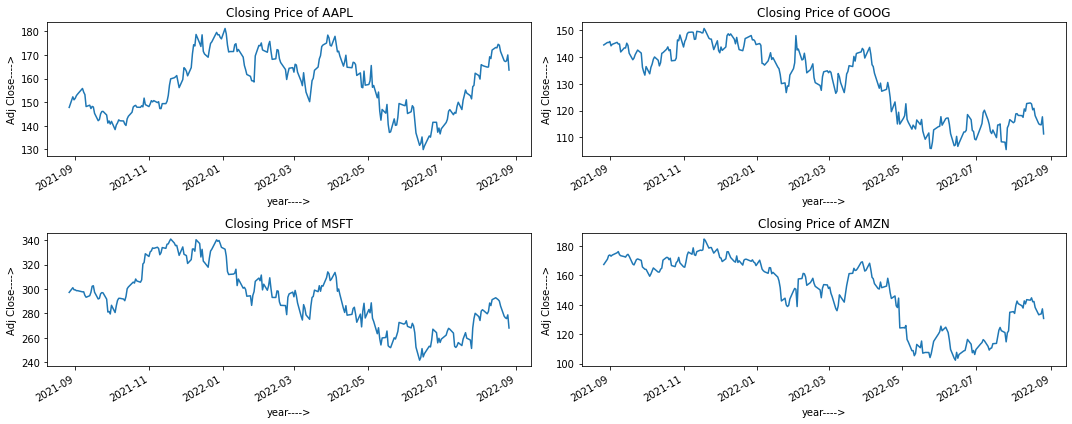

In [ ]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=2, bottom=1)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close---->')
    plt.xlabel('year---->')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()


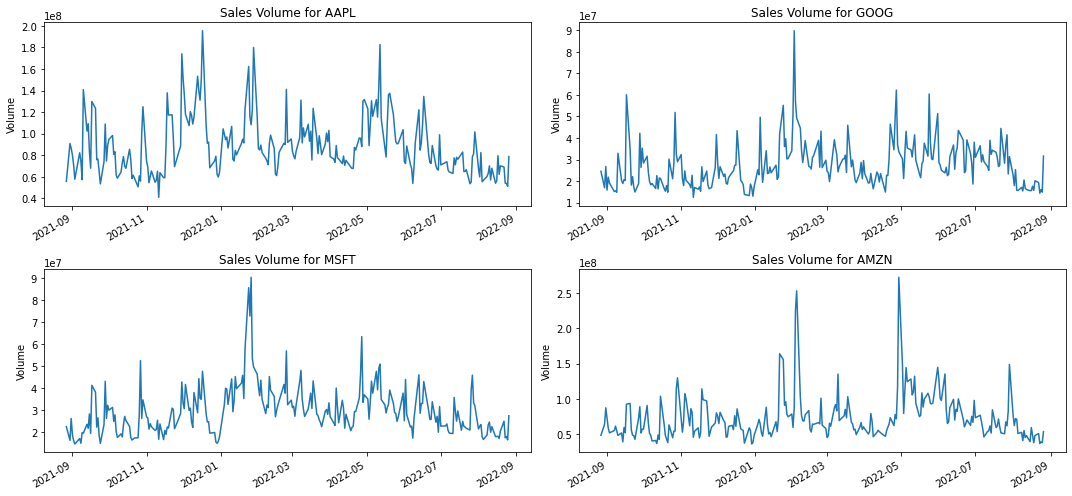

In [ ]:
# Now let's plot the total volume of stock being traded each day


plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
# The below function is used to fit the above given functions in the given region
plt.tight_layout()

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


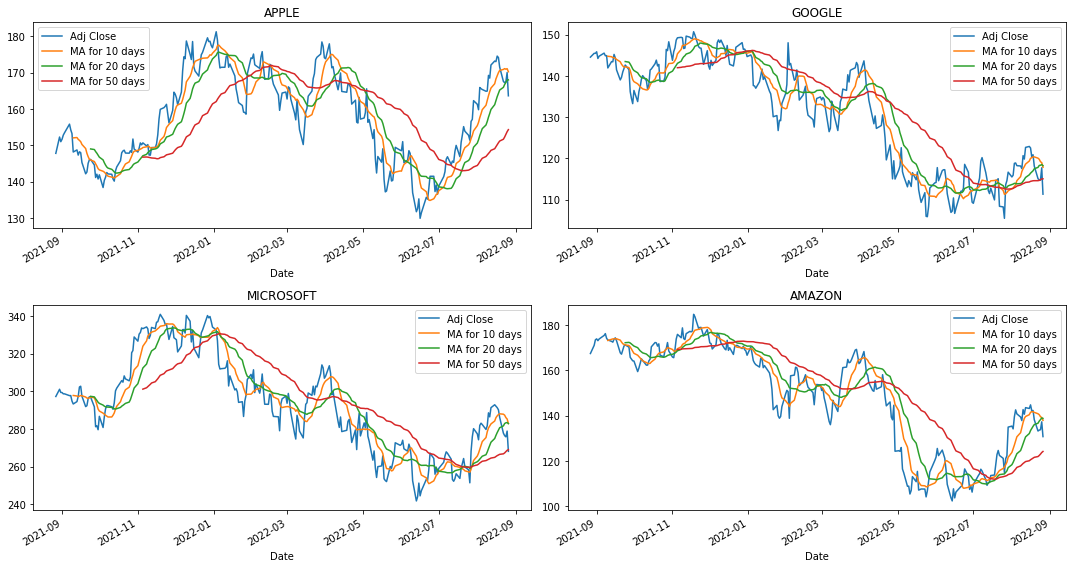

In [ ]:
#Let's assume it as a coordinate axes
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()